# ISOM 352 Applied Data Analytics with Coding
## M3.6 Multiple Regression models 

In this class, we will discuss how to build better regression models. Specifically, 
- make prediction
- How to leverage categorical variables in regression
- Bring everything together in Multiple regression


### Part 0: Review from previous class

In [1]:
# Install and import the library 
# %pip install pandas matplotlib seaborn statsmodels -q

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import statsmodels.api as sm

### 0.1 Pre-processing the data

In [2]:

# import the tips.csv into pandas
df = pd.read_csv('tips.csv')

# Cast the data types 
for var in ['sex', 'smoker', 'day', 'time']:
    df[var] = df[var].astype('category')

df['CC Number'] = df['CC Number'].astype('object')

# Create new variables
df['bill_per_person'] = (df['total_bill'] / df['size']).round(2)
df['tip_pct'] = df['tip'] / df['total_bill']

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   total_bill       244 non-null    float64 
 1   tip              244 non-null    float64 
 2   sex              244 non-null    category
 3   smoker           244 non-null    category
 4   day              244 non-null    category
 5   time             244 non-null    category
 6   size             244 non-null    int64   
 7   Payer Name       244 non-null    object  
 8   CC Number        244 non-null    object  
 9   Payment ID       244 non-null    object  
 10  bill_per_person  244 non-null    float64 
 11  tip_pct          244 non-null    float64 
dtypes: category(4), float64(4), int64(1), object(3)
memory usage: 16.9+ KB


### 0.2: Describe relationships between two variables 
describe the relationship between two categoircal variables
Q: which meal during a day tends to have more smokers?

In [ ]:
axes[0,0]

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

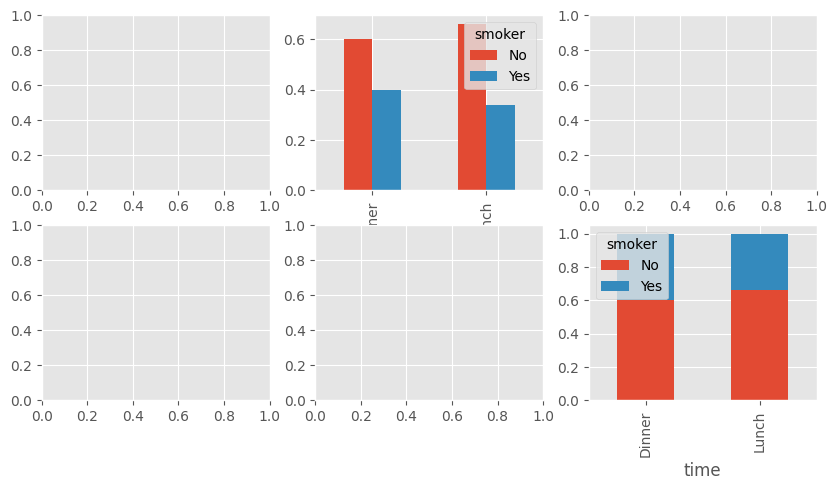

In [6]:
# Use crosstab to get the frequency of smokers by meal time
ctab_time_smoker = pd.crosstab(df['time'], df['smoker'], normalize="index")

# create a 1x2 subplot
fig, axes = plt.subplots(
    nrows=2, 
    ncols=3, 
    figsize=(10, 5))

# Plot the frequency of smokers by meal time
ctab_time_smoker.plot(kind='bar', stacked=False, ax=axes[0,1])

# Plot the frequency of smokers by meal time
ctab_time_smoker.plot(kind='bar', stacked=True, ax=axes[1,2])

# Show the plot
plt.show()



`Insights:`

### Describe two mixed variables 
Q: which meal people tend to spend more per person

Graphs: Boxplot, violin plot

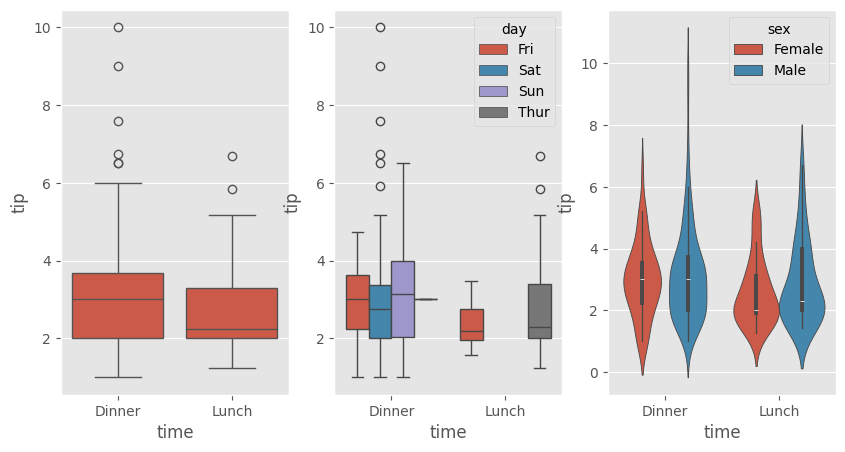

In [ ]:
# Explore meal time and spending with pivot table

# create a 1x2 subplot
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# visualize the relationship between meal time and tip with boxplot
sns.boxplot(x='time', y='tip',  data=df,  ax=axes[0])
sns.boxplot(x='time', y='tip', hue='sex',  data=df,  ax=axes[1])

# visualize the relationship between meal time and tip with violin plot
sns.violinplot(x='time', y='tip', hue='sex',  data=df, ax=axes[2])

# Show the plot
plt.show()


In [14]:
# numerically describe the relationship between meal time and tip

groupby_time = df.groupby(by=['time'], )['tip'].aggregate('median')
print(groupby_time)

# groupby tip by sex
groupby_time_sex = df.groupby(by=['time', 'sex'], )['tip'].aggregate('median')
groupby_time_sex.unstack()

# an alternative way to do this is to use pivot table
df.pivot_table(index='time', columns='sex', values='tip', aggfunc='mean').round(3)



time
Dinner    3.00
Lunch     2.25
Name: tip, dtype: float64


C:\Users\wgu30\AppData\Local\Temp\ipykernel_9320\1233040751.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_time = df.groupby(by=['time'], )['tip'].aggregate('median')
C:\Users\wgu30\AppData\Local\Temp\ipykernel_9320\1233040751.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_time_sex = df.groupby(by=['time', 'sex'], )['tip'].aggregate('median')
C:\Users\wgu30\AppData\Local\Temp\ipykernel_9320\1233040751.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning an

sex,Female,Male
time,,
Dinner,3.002,3.145
Lunch,2.583,2.882


`Insights:`

### Two quantitative variables
- How does the total bill vary with party size 
- How does the total bill vary with party size (for different days of the week)?
- How does the total bill amount relate to the tip amount?
- How does the total bill amount relate to the tip amount (for male vs female)?
- How does the total bill amount relate to the tip amount (for smokers vs non-smokers)?

Typical graphs: Scatter plot, heatmap

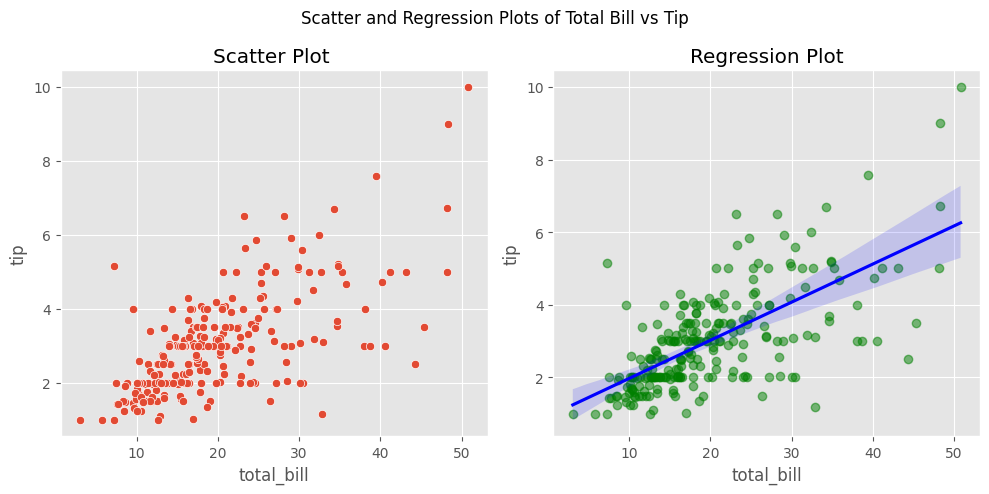

In [18]:
# create 1x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# create a scatter plot of 'total_bill' vs 'tip'
sns.scatterplot(x='total_bill', y='tip', data=df, ax=axes[0])

# create a regression plot of 'total_bill' vs 'tip'
sns.regplot(
    x='total_bill', y='tip', data=df, 
    ax=axes[1],
    scatter_kws={'alpha': 0.5, 'color': 'green'},
    line_kws={'color': 'blue'},
    ci=99
    )

# add a title to the plot   
axes[0].set_title('Scatter Plot ')
axes[1].set_title('Regression Plot')

# add a title to the figure
plt.suptitle('Scatter and Regression Plots of Total Bill vs Tip')
fig.tight_layout()
plt.show()



                 total_bill   tip  size  bill_per_person  tip_pct
total_bill             1.00  0.68  0.60             0.65    -0.34
tip                    0.68  1.00  0.49             0.35     0.34
size                   0.60  0.49  1.00            -0.18    -0.14
bill_per_person        0.65  0.35 -0.18             1.00    -0.31
tip_pct               -0.34  0.34 -0.14            -0.31     1.00


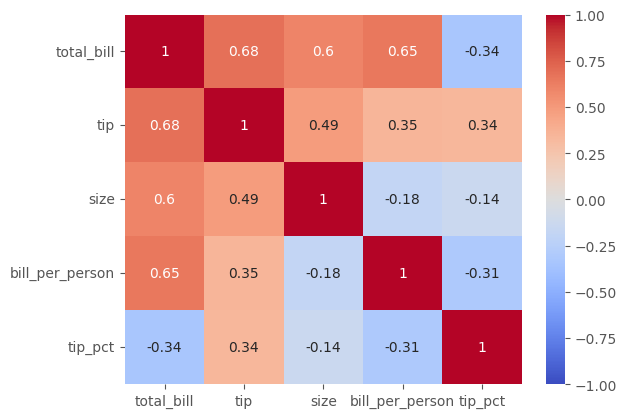

In [20]:
# get the correlation between 'tip' and 'total_bill' for different days
corr_df = df.corr(numeric_only=True).round(2)
print(corr_df)

# create a heatmap of the correlation matrix
sns.heatmap(
    data=corr_df, 
    annot=True, cmap='coolwarm',
    vmin=-1, vmax=1, center=0,
    )
plt.show()

### Review: How much is the impact with Simple Regression
$y=mx+b$
- $X$: the independent variable, the predictor, the feature
- $y$: the dependent variable, the target, the response

In [21]:
# Specify the predictor and the target
y = df['tip']
x = df['total_bill']

# Add a constant to the model (statsmodels doesn't do this by default)
X= sm.add_constant(x)

# Create a model and fit the data
model = sm.OLS(y,X).fit()

# Display the summary results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           6.69e-34
Time:                        12:19:38   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## Significance And Slope Of The Variables
- significance: pvalue `model.pvalues`
- impact: slope rise over run on average `model.params`

In [22]:
# check the pvalue of total_bill
pvalue_bill = model.pvalues['total_bill'].round(3)
print(f"The p-value for total_bill is {pvalue_bill:.3f}")

# check the impact of total_bill
b_bill = model.params['total_bill'].round(3)
print(f"The slope of total_bill is {b_bill:.3f}")



The p-value for total_bill is 0.000
The slope of total_bill is 0.105


## Part 1: Make prediction and Evaluate Quality

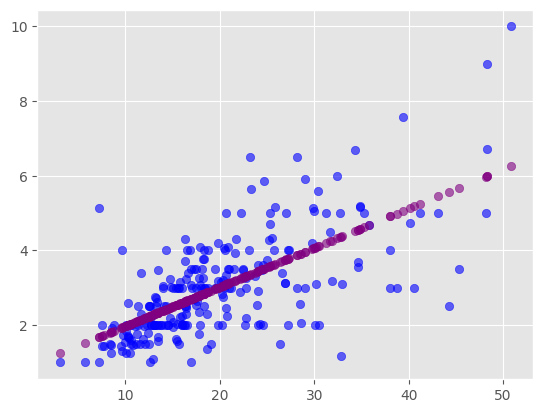

In [27]:
# Make predictions with the model by plugging in the X values
y_pred = model.predict(X)
y_pred
# Visualize the actual vs Prediction with bar plot

df_plot = pd.DataFrame({
    'School District': x_school,  # 0 or 1
    'Actual Price': y,
    'Predicted Price': y_pred_school})


In [1]:
# Visualize with the residual plot
# Calculate residuals (actual - predicted) or directly use model.resid
residuals = y - y_pred


# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Residuals vs Predicted values
ax1.scatter(y_pred, residuals, color='blue', alpha=0.6)
# add labels and title
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Values')

# Plot 2: Histogram of residuals



# kind of normal distribution with some high residuals



NameError: name 'y' is not defined

In [ ]:
# Evaluate model fit with R2
r2 = model.rsquared.round(3)
print(f"The R-squared value is {r2:.2%}")

# Quantify the model fit with RMSE



## Part 2: How do the Categorical variables relate to `tip` 
Ex: How does `sex` relate to `tip`?

- Step 1: Descriptive
- Step 2: Simple regression 


### Part 2.2 Implement linear regression with categorical variables
- simple regression

In [31]:
# Creating dummy variables for the `categorical` variables 
df_dummy = pd.get_dummies(
    data=df, 
    drop_first=True,    # only need n-1 dummy variables because of multicollinearity
    dtype='int8',      # default is bool,
    columns=['sex', 'day', 'time']
    )

df_dummy.info()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   total_bill       244 non-null    float64 
 1   tip              244 non-null    float64 
 2   smoker           244 non-null    category
 3   size             244 non-null    int64   
 4   Payer Name       244 non-null    object  
 5   CC Number        244 non-null    object  
 6   Payment ID       244 non-null    object  
 7   bill_per_person  244 non-null    float64 
 8   tip_pct          244 non-null    float64 
 9   sex_Male         244 non-null    int8    
 10  day_Sat          244 non-null    int8    
 11  day_Sun          244 non-null    int8    
 12  day_Thur         244 non-null    int8    
 13  time_Lunch       244 non-null    int8    
dtypes: category(1), float64(4), int64(1), int8(5), object(3)
memory usage: 16.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entr

In [32]:
# let's create a model with the sex dummy for tip
# Specify the predictor and the target
y = df['tip']
x = df_dummy['sex_Male']

# Add a constant to the model (statsmodels doesn't do this by default)
X= sm.add_constant(x)

# Create a model and fit the data
model = sm.OLS(y,X).fit()

# Display the summary results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.926
Date:                Thu, 06 Mar 2025   Prob (F-statistic):              0.166
Time:                        12:47:20   Log-Likelihood:                -423.98
No. Observations:                 244   AIC:                             852.0
Df Residuals:                     242   BIC:                             859.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8334      0.148     19.137      0.0

### Part 2.3: Prediction and accuracy of prediction
- Make a prediction with model
- Evaluate the quality of prediction with `R2` and `RMSE` (Root Mean Squared Error)

In [ ]:
# Get model prediction


# Plot the data



In [ ]:
# Evaluate relative model fit with R2


# Evaluate prediction accuracy with RMSE = SQRT(MSE)
